In [50]:
# Import Libraries
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the classifiers
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Import the tests on the classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score as f1_score_model

In [51]:
# Reading the dataset
datacsv = pd.read_csv('./smoke.csv',index_col = False)
data = datacsv.copy()

In [52]:
# Displaying 10 random samples from the dataset first 5 data
data.sample(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
4945,4945,1654738276,-8.094,48.41,34,400,13251,20188,939.702,2.20,2.28,15.13,2.360,0.053,4945,1
13201,13201,1654746532,20.621,53.37,1061,512,12849,19465,938.884,2.26,2.34,15.52,2.420,0.055,13201,1
1753,1753,1654735084,24.479,54.41,45,400,13119,20013,939.611,0.68,0.70,4.65,0.725,0.016,1753,0
11561,11561,1654744892,12.518,52.11,1092,625,12806,19457,939.065,2.45,2.54,16.83,2.625,0.059,11561,1
29248,29248,1654765597,19.920,53.48,110,400,13229,20113,939.651,2.28,2.37,15.67,2.443,0.055,4254,1
13774,13774,1654747105,18.769,49.14,1216,532,12836,19432,938.882,2.11,2.19,14.50,2.262,0.051,13774,1
27325,27325,1654763674,18.630,47.56,44,400,13191,20115,939.592,1.09,1.14,7.52,1.173,0.026,2331,0
15998,15998,1654749329,12.080,51.52,1161,404,12882,19442,938.775,1.56,1.62,10.74,1.674,0.038,15998,1
23804,23804,1654757135,-17.429,53.26,1387,404,12978,19385,938.707,1.70,1.77,11.71,1.826,0.041,23804,1
7993,7993,1654741324,-4.183,51.08,299,400,13116,19973,939.393,0.39,0.40,2.68,0.417,0.009,7993,1


In [53]:
# The shape of the data - The dataset has about 62630 rows and 16 columns
data.shape

(62630, 16)

In [54]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [55]:
# Info of the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [56]:
# Check if any value in NA
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

<AxesSubplot:>

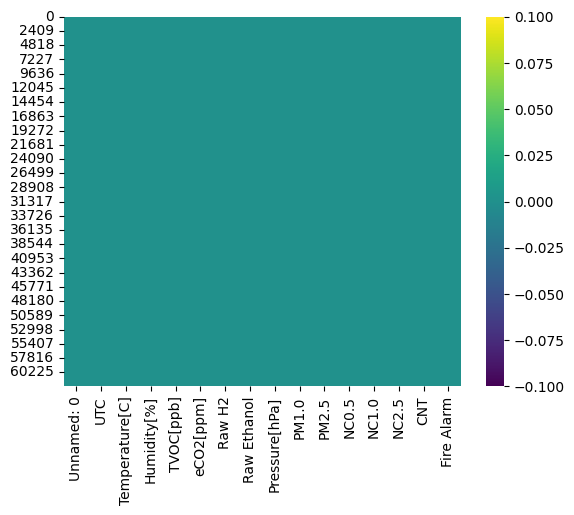

In [57]:
# Heat map - check image 
sns.heatmap(data.isnull(), cmap='viridis')

In [58]:
# In the first index of the column (Unnamed:0) is not relevant as it is just idexing the rows as such we will drop it

data = data.drop(['Unnamed: 0'], axis = 1)

In [59]:
# checking for wrong entries such as special symbols e.g *,#,-,?,$ etc.
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

UTC : [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
Temperature[C] : [20.    20.015 20.029 ... 15.714 16.333 16.957]
Humidity[%] : [57.36 56.67 55.96 ... 16.59 15.99 15.84]
TVOC[ppb] : [  0  30  36 ... 513 517 643]
eCO2[ppm] : [ 400  403  406 ... 1365 1013  948]
Raw H2 : [12306 12345 12374 ... 13727 13718 13731]
Raw Ethanol : [18520 18651 18764 ... 20413 20468 20482]
Pressure[hPa] : [939.735 939.744 939.738 ... 936.635 936.642 936.659]
PM1.0 : [0.   0.9  0.89 ... 4.98 4.57 3.62]
PM2.5 : [0.   3.78 3.71 ... 5.17 4.04 3.76]
NC0.5 : [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
NC1.0 : [0.    4.369 4.289 ... 3.881 0.641 0.731]
NC2.5 : [0.    2.78  2.73  ... 0.202 0.16  0.121]
CNT : [    0     1     2 ... 24991 24992 24993]
Fire Alarm : [0 1]


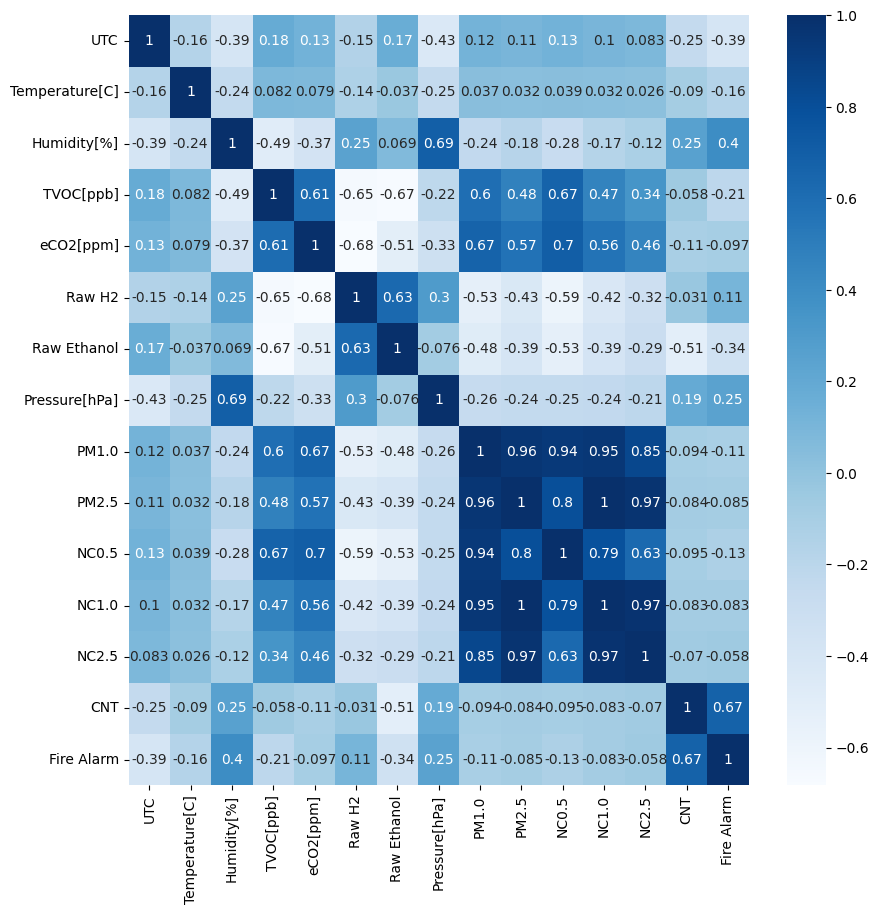

In [60]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')
fig.savefig("matrix.png")

Note: Since we remove columns UTC and CNT the reason is that looking at the dataset UTC and CNT does not impact fire causes. so we will select from 'temperature - NC2.5'.

In [61]:
inputs = list(data.columns)[1:-2]
targets = ['Fire Alarm']

In [62]:
training_inputs = data[inputs].copy()
training_outputs = data[targets].copy()

In [63]:
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(training_inputs, training_outputs, test_size=0.2,random_state=43)

In [64]:
# We will use *50104* dataset for training purpose 
X_train.shape

(50104, 12)

In [65]:
# We will use *12526* dataset for validation and see how well the trained model is performing
X_test.shape

(12526, 12)

In [66]:
X_train.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
36061,26.180,49.07,1034,651,12798,19472,939.114,2.07,2.15,14.27,2.226,0.050
45953,26.850,47.87,1343,414,12943,19387,938.693,1.75,1.81,12.02,1.875,0.042
23467,-20.914,50.19,1400,404,12974,19383,938.694,2.03,2.11,13.97,2.179,0.049
13899,18.203,51.42,1105,502,12846,19451,938.913,2.44,2.54,16.82,2.622,0.059
43215,24.820,52.36,1218,427,12901,19422,938.716,1.74,1.81,11.97,1.866,0.042


### Scaling the Features (Normalization)<a class="anchor" id="normalization"></a>

To Improve model accurace we normalize the dataset. 
Normalization helps to give equal importance to each vairable so not a single variable is resposponsible to boost the model performance in one direction only because it is big.

In [67]:
scaler = MinMaxScaler().fit(data[inputs])

X_train[inputs] = scaler.transform(X_train[inputs])
X_test[inputs] = scaler.transform(X_test[inputs])

In [68]:
X_test.describe().loc[['min', 'max']]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
min,0.000000,0.000000,0.0,0.000000,0.003509,0.00837,0.001665,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.997437,0.995191,1.0,0.958507,0.999362,1.00000,0.999445,0.966891,0.934358,0.956456,0.932732,0.918014


In [69]:
y_train

,Fire Alarm
36061,1
45953,1
23467,1
13899,1
43215,1
...,...
59669,0
40753,1
51455,0
19776,1


Now we have our normalize data. Next we need to train our model for prediction

In [70]:
# This function evaluates the train dataset
def accuracy_model(models):
    model_name = []
    confusion_metrx = []
    execution_time = []
    model_score_data = []
    auc_data = []
    f1_score = []
    accuracy_score_data = []
    
    for model in models:
        
        start_time = time.time()
        model.fit(X_train, y_train.values.ravel())
        end_time = time.time()
        
        model_name.append(type(model).__name__)

        #model prediction
        train_preds = model.predict(X_train)

        # model_score
        ms_train_preds = model.score(X_train, y_train)
        model_score_data.append(ms_train_preds)

        # Accuracy_score metrix
        as_train_acc = accuracy_score(y_train, train_preds)
        accuracy_score_data.append(as_train_acc)

        # confusion metrix
        cf_train_acc = confusion_matrix(y_train, train_preds)
        confusion_metrx.append(cf_train_acc)

        #Area under curve
        auc_train_acc = roc_auc_score(y_train, train_preds)
        auc_data.append(auc_train_acc)

        # f1 score
        f1_train = f1_score_model(y_train, train_preds)
        f1_score.append(f1_train)
        
        execution_time.append(end_time-start_time)

        Dict = {'Model':model_name,
                'Execution Time(sec)':execution_time,
                'Model Score':model_score_data, 
                'Confusion Metrx':confusion_metrx,
                'AUC':auc_data,
                'F1 Score ':f1_score, 
                'Accuracy Score':accuracy_score_data}
    return pd.DataFrame(Dict) 

In [71]:
# Evalution of test dataset
def test_acc_model(models):
    model_score_data = []
    f1_score = []
    accuracy_score_data = []
    model_name = []
    confusion_metrx = []
    imp_features = []
    execution_time = []
    auc_data = []
    
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.values.ravel())
        end_time = time.time()
        try:
            imp_features.append(pd.DataFrame({
                (str(model) + ': Features'): X_train.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False))
        except:
            pass
        
        model_name.append(type(model).__name__)

        # Predict model
        pred_model = model.predict(X_test)

        # Score of model
        model_score = model.score(X_test, y_test)
        model_score_data.append(model_score)

        # Accuracy score
        as_test_acc = accuracy_score(y_test, pred_model)
        accuracy_score_data.append(as_test_acc)

        # Confusion metrix
        cf_test_acc = confusion_matrix(y_test, pred_model)
        confusion_metrx.append(cf_test_acc)

        # Area under curve
        auc_test = roc_auc_score(y_test, pred_model)
        auc_data.append(auc_test)

        # F1 score
        f1_test = f1_score_model(y_test, pred_model)
        f1_score.append(f1_test)
        
        execution_time.append(end_time-start_time)

    Dict = {'Model':model_name,
            'Execution Time(sec)':execution_time,
            'Model Score':model_score, 
            'Confusion Metrx':confusion_metrx,
            'AUC':auc_data,
            'F1 Score ':f1_score, 
            'Accuracy Score':accuracy_score}
    
    return pd.DataFrame(Dict), imp_features

In [72]:
# List of Machine learning models
models = [
    LogisticRegression(solver='lbfgs', max_iter=1000), 
    GradientBoostingClassifier(), 
    AdaBoostClassifier(), 
    RandomForestClassifier(n_estimators = 100),
    ExtraTreeClassifier(), 
    DecisionTreeClassifier(),
    GaussianNB(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
]

In [73]:
# The training accuracy
accuracy_model(models)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,LogisticRegression,1.546608,0.884101,"[[10020, 4337], [1470, 34277]]",0.828398,0.921908,0.884101
1,GradientBoostingClassifier,8.850539,0.999840,"[[14353, 4], [4, 35743]]",0.999805,0.999888,0.999840
2,AdaBoostClassifier,1.538323,0.999621,"[[14343, 14], [5, 35742]]",0.999442,0.999734,0.999621
3,RandomForestClassifier,2.615106,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
4,ExtraTreeClassifier,0.007318,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
5,DecisionTreeClassifier,0.119219,1.000000,"[[14357, 0], [0, 35747]]",1.000000,1.000000,1.000000
6,GaussianNB,0.004548,0.764330,"[[3404, 10953], [855, 34892]]",0.606589,0.855280,0.764330
7,MLPClassifier,2.669880,0.907512,"[[11520, 2837], [1797, 33950]]",0.876063,0.936113,0.907512


In [74]:
testing_accuracy, imp_features = test_acc_model(models)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [75]:
testing_accuracy

,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,LogisticRegression,0.198912,0.906435,"[[2454, 1062], [386, 8624]]",0.827555,0.922550,<function accuracy_score at 0x160ec7490>
1,GradientBoostingClassifier,7.610183,0.906435,"[[3514, 2], [1, 9009]]",0.999660,0.999834,<function accuracy_score at 0x160ec7490>
2,AdaBoostClassifier,1.537362,0.906435,"[[3514, 2], [2, 9008]]",0.999605,0.999778,<function accuracy_score at 0x160ec7490>
3,RandomForestClassifier,2.691298,0.906435,"[[3516, 0], [0, 9010]]",1.000000,1.000000,<function accuracy_score at 0x160ec7490>
4,ExtraTreeClassifier,0.007320,0.906435,"[[3512, 4], [5, 9005]]",0.999154,0.999501,<function accuracy_score at 0x160ec7490>
5,DecisionTreeClassifier,0.115818,0.906435,"[[3516, 0], [0, 9010]]",1.000000,1.000000,<function accuracy_score at 0x160ec7490>
6,GaussianNB,0.004459,0.906435,"[[834, 2682], [223, 8787]]",0.606226,0.858147,<function accuracy_score at 0x160ec7490>
7,MLPClassifier,2.359949,0.906435,"[[2827, 689], [483, 8527]]",0.875216,0.935696,<function accuracy_score at 0x160ec7490>


### Feature Importance <a class="anchor" id="f_importance"></a>

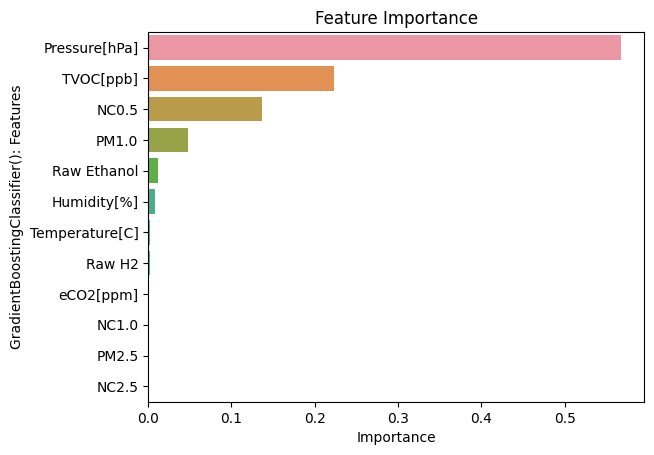

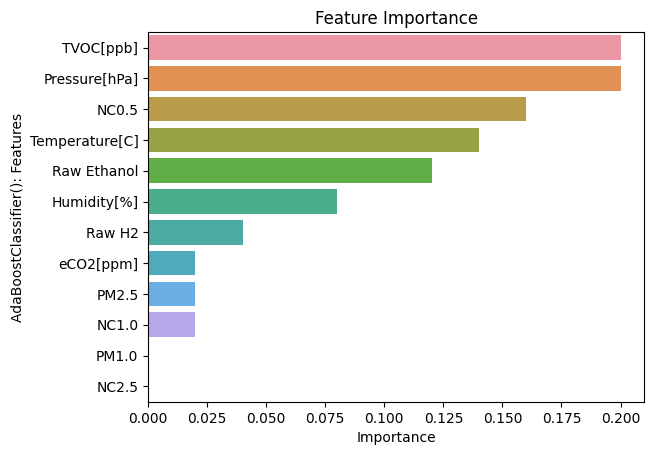

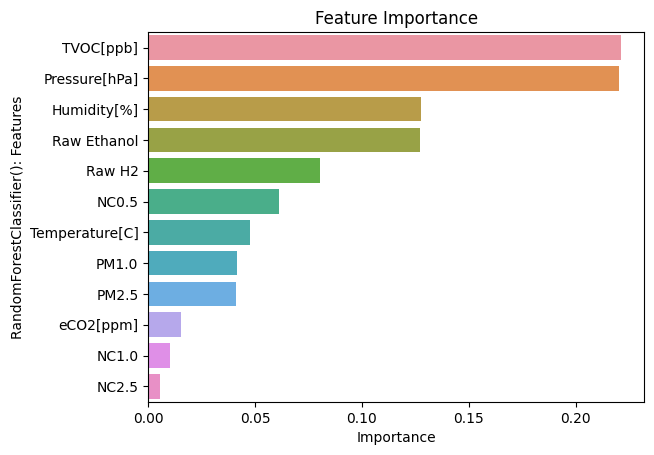

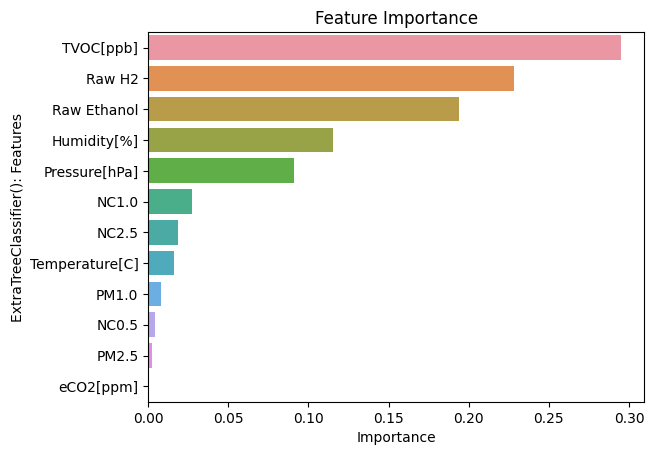

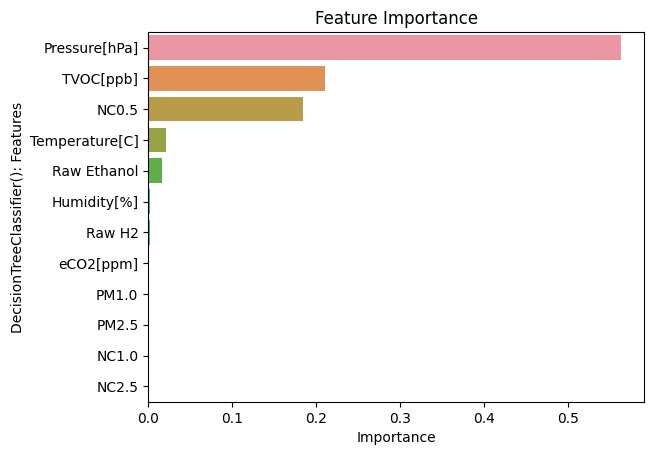

In [76]:
# initializing to index 0 to plot feature of first model
for each_model in range(len(imp_features)):
    plt.title('Feature Importance')
    axis = sns.barplot(data=imp_features[each_model], x='Importance', y = imp_features[each_model].columns[0]);
    fig = axis.get_figure()
    plt.show()
    model = imp_features[each_model].columns[0]
    fig.savefig("FeatureImportance{}.png".format(imp_features[each_model].columns[0])) 

### Conclusion <a class="anchor" id="conclusion"></a>

In [77]:
KFModel = StratifiedKFold(n_splits=5)
p_rf= np.zeros(training_outputs.shape[0])

In [78]:
print("CONFUSTION MATRIX")
for n in range(10,100,10):
    for train,test in KFModel.split(training_inputs,training_outputs):
        X_train,X_test,Y_train,Y_test = train_test_split(training_inputs,training_outputs,test_size=0.2,random_state=33)
        classifier_gb = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=33)
        classifier_gb.fit(X_train,Y_train.values.ravel())
        Y_pred = classifier_gb.predict(X_test)
        conf_mat=confusion_matrix(Y_test,Y_pred)
        
        print(conf_mat)
    print('Score for n:','',accuracy_score(Y_test,Y_pred))

[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
Score for n:  0.9997604981638193
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
Score for n:  0.9997604981638193
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
Score for n:  0.9997604981638193
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
[[3623    2]
 [   1 8900]]
